# Exciton Model for vdWHs

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ase.units

Hartree = ase.units.Hartree
Bohr = ase.units.Bohr

In [2]:
%matplotlib inline

In [3]:
from matplotlib import rcParams
rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.sans-serif": ["Computer Modern Roman"],
    "font.size": 16})
rcParams['axes.titlepad'] = 20

In [4]:
def heatmap(data, xlabels, ylabels, cbarlabel, **kwargs):
    # if not ax:
    #     ax = plt.gca()
    
    plt.imshow(data, **kwargs)
    plt.xticks(np.arange(len(xlabels)), labels=xlabels)
    plt.yticks(np.arange(len(ylabels)), labels=ylabels)
    #change color of oxide label and unique materials
    for ticklabel,string in zip(plt.gca().get_xticklabels(),xlabels):
        inYlabal=False
        #check whether it is unique (inYlabal=False)
        for ystring in ylabels:
            if string[2:] in ystring:
                inYlabal=True
        #COLOR
        if inYlabal==False:
            #if it is a unique oxide: color magent
            if 'O2' in string:
                ticklabel.set_color('m')
            #if it is not an oxide: color blue
            else:
                ticklabel.set_color('b')
        #if it is a non-unqie oxide: color red
        if inYlabal==True:
            if 'O2' in string:
                ticklabel.set_color('r')
        
    for ticklabel,string in zip(plt.gca().get_yticklabels(),ylabels):
        inXlabal=False
        for xstring in xlabels:
            if string[2:] in xstring:
                inXlabal=True
        if inXlabal==False:
            #if it is a unique oxide: color magent
            if 'O2' in string:
                ticklabel.set_color('m')
            #if it is not an oxide: color blue
            else:
                ticklabel.set_color('b')
        #if it is a non-unqie oxide: color red
        if inXlabal==True:
            if 'O2' in string:
                ticklabel.set_color('r')

    im_ratio = data.shape[0]/data.shape[1]
    plt.colorbar(label=cbarlabel,fraction=0.046*im_ratio, pad=0.04)
    # cbar.ax.set_ylabel(cbarlabel, rotation=0, va="bottom")

    # Loop over data dimensions and create text annotations.
    for i in range(len(ylabels)):
        for j in range(len(xlabels)):
            colors = ['k', 'w']
            color = colors[int(data[i,j] > np.mean(data))]
            plt.text(j, i, data[i, j], ha="center", va="center", color=color)

## QEH Masses and Potentials

In [5]:
#materials = ['WS2','MoS2','WSe2','MoSe2','CrS2','CrSe2']
nFilling = 1
nPadding = 0
def load_hs(fileprefix, nFilling, nPadding):
    vdWH = np.load(fileprefix + '_nFilling=' + str(nFilling) + '_nPadding=' + str(nPadding)+ '.npz')
    return vdWH

In [6]:
vdWH_qeh = load_hs('wannier', nFilling, nPadding)
E_b_heat_mat = vdWH_qeh['E_b_heat_mat']
E_b_heat_xlabels = vdWH_qeh['E_b_heat_xlabels']
E_b_heat_ylabels = vdWH_qeh['E_b_heat_ylabels']

In [7]:
#datacheck
def check_data(Matrix,E_b_heat_xlabels,E_b_heat_ylabels):
    EbMax=10
    #E_b_heat_mat[1,2]=10
    #print(E_b_heat_mat)
    UpperBound=9
    while EbMax>UpperBound:
        EbMax=np.max(E_b_heat_mat)
        if EbMax>UpperBound:
            #print(np.where(Eb_original==Ebmax))
            ne=np.where(E_b_heat_mat==EbMax)[0][0]
            ph=np.where(E_b_heat_mat==EbMax)[1][0]
            print(ne,ph)
            Matrix=np.delete(Matrix,ne,axis=0)#delete row
            Matrix=np.delete(Matrix,ph,axis=1)#delete column
            E_b_heat_xlabels=np.delete(E_b_heat_xlabels,ph)
            E_b_heat_ylabels=np.delete(E_b_heat_ylabels,ne)
            print(Matrix)
        else:
            print('No altering needed:)')
    return Matrix,E_b_heat_xlabels,E_b_heat_ylabels
E_b_heat_mat,E_b_heat_xlabels,E_b_heat_ylabels=check_data(E_b_heat_mat,E_b_heat_xlabels,E_b_heat_ylabels)
#print(E_b_heat_mat)

No altering needed:)


In [8]:
#choose some data
xlabel_choose=['p-H-MoO2','p-H-MoTe2']
ylabel_choose=['n-H-WO2','n-H-MoSe2']
xlabel_choose=E_b_heat_xlabels
ylabel_choose=E_b_heat_ylabels
#xlabel_choose=E_b_heat_xlabels
#ylabel_choose=E_b_heat_ylabels
#Eb-matrix
Nx=len(xlabel_choose)
Ny=len(ylabel_choose)
def choose(Matrix_in,xlabel_choose,ylabel_choose):
    EbChoose=np.zeros((Ny,Nx))
    Matrix_inCp=np.copy(Matrix_in)
    for ix in range(Nx):
        for iy in range(Ny):
            lx=xlabel_choose[ix]
            ly=ylabel_choose[iy]
            #print(ly==E_b_heat_ylabels)
            yRow=Matrix_inCp[ly==E_b_heat_ylabels][0]
            #print(yRow)
            #print(lx==E_b_heat_xlabels)
            xEle=yRow[lx==E_b_heat_xlabels]
            #print(xEle)
            EbChoose[iy,ix]=xEle
    return EbChoose
EbChoose=choose(E_b_heat_mat,xlabel_choose,ylabel_choose)

In [9]:
#sort matrix
Matrix_sortby=EbChoose#choose matrix to sort by
xLabel_sort=xlabel_choose
yLabel_sort=ylabel_choose
Ne,Nh=np.shape(Matrix_sortby)        #number of rows and columns
Eb_original=np.copy(Matrix_sortby)   #copy Eb_matrix
EbPlot=np.zeros((Ne,Nh))            #initialize sorted matrix
Ebmax=np.max(Eb_original)           #find maximum
#print(np.where(Eb_original==Ebmax))#yes
ne=np.where(Eb_original==Ebmax)[0][0]
ph=np.where(Eb_original==Ebmax)[1][0]
#print(ne,ph)#yes
EbPlot[0,0]=Ebmax
Eb_original[ne,ph]=0
#initialize new labels
xlabelsPlot=[]
ylabelsPlot=[]
#add first elements to label
xlabelsPlot.append(xLabel_sort[ph])#columns
ylabelsPlot.append(yLabel_sort[ne])#rows
#initialize new orders
ColumnOrder=np.zeros((Nh))
RowOrder=np.zeros((Ne))
ColumnOrder[0]=ph
RowOrder[0]=ne
# vectors to sort by 
EbColumnsort=np.copy(Eb_original)[ne,:]#pick out the row to sort columns
EbRowsort=np.copy(Eb_original)[:,ph]#pick out the column to sort rows
#check with print statements
#print(EbColumnsort)
#print(EbRowsort)
#print(EbPlot)
#sort p-doped materials (coloumns)
for i_h in range(1,Nh):
    #find max
    Ebmax_h=np.max(EbColumnsort)
    locmax_h=np.argmax(EbColumnsort)
    #update order and new energies and xlabel
    ColumnOrder[i_h]=locmax_h#update list of column orders
    EbColumnsort[locmax_h]=0#delete maximum from sorting energies
    EbPlot[0,i_h]=Ebmax_h#update Eb_matrix
    xlabelsPlot.append(xLabel_sort[locmax_h])#update xlabel
    #check with prints
    # print(locmax_h)
    # print(EbPlot)
    # print(EbColumnsort)
    # print(E_b_heat_xlabels[locmax_h])
    # print(xlabelsPlot[i_h])

#sort n-doped materials (rows)
for i_e in range(1,Ne):
    #find max
    Ebmax_e=np.max(EbRowsort)
    locmax_e=np.argmax(EbRowsort)
    #update order and new energies and xlabel
    RowOrder[i_e]=locmax_e#update list of column orders
    EbRowsort[locmax_e]=0#delete maximum from sorting energies
    EbPlot[i_e,0]=Ebmax_e#add energy to Eb_matrix
    ylabelsPlot.append(yLabel_sort[locmax_e])#add label to xlabel
    #check with prints
    # print(locmax_e)
    # print(EbPlot)
    # print(E_b_heat_ylabels[locmax_e])
#put in the rest of the elements in the energy matrix
for ie in range(1,Ne):
    for ih in range(1,Nh):
        #take locations
        loce=int(RowOrder[ie])
        loch=int(ColumnOrder[ih])
        #print(loce,loch)
        #find energy and update
        Eb=Eb_original[loce,loch]
        EbPlot[ie,ih]=Eb

#sort future matrices
def sort_matrix(Matrix,RowOrder,ColumnOrder):
    MatrixSort=np.zeros((Ne,Nh))
    for ie in range(Ne):
        for ih in range(Nh):
            #take locations
            loce=int(RowOrder[ie])
            loch=int(ColumnOrder[ih])
            #print(loce,loch)
            #find energy and update
            Eb=Matrix[loce,loch]
            MatrixSort[ie,ih]=Eb
    return MatrixSort
        

In [10]:
def plot_E_B(E_b_heat_mat,E_b_heat_xlabels,E_b_heat_ylabels, cbarlabel = r'$E_b$ [meV]', file_ending='unknown'):
    heatmap(np.round(E_b_heat_mat*10**3).astype(int),
        E_b_heat_xlabels, E_b_heat_ylabels, cbarlabel=cbarlabel,
        cmap='Blues')
    plt.tight_layout()
    plt.savefig('./plots/vdWH_E_b_' + file_ending + '.pdf')
    plt.savefig('./plots/vdWH_E_b_' + file_ending + '.png')
    plt.show()

Exciton binding energies for different
 bilayer combinations with 0 encapsulating and 1 inner hBN layers
 using QEH masses and potentials


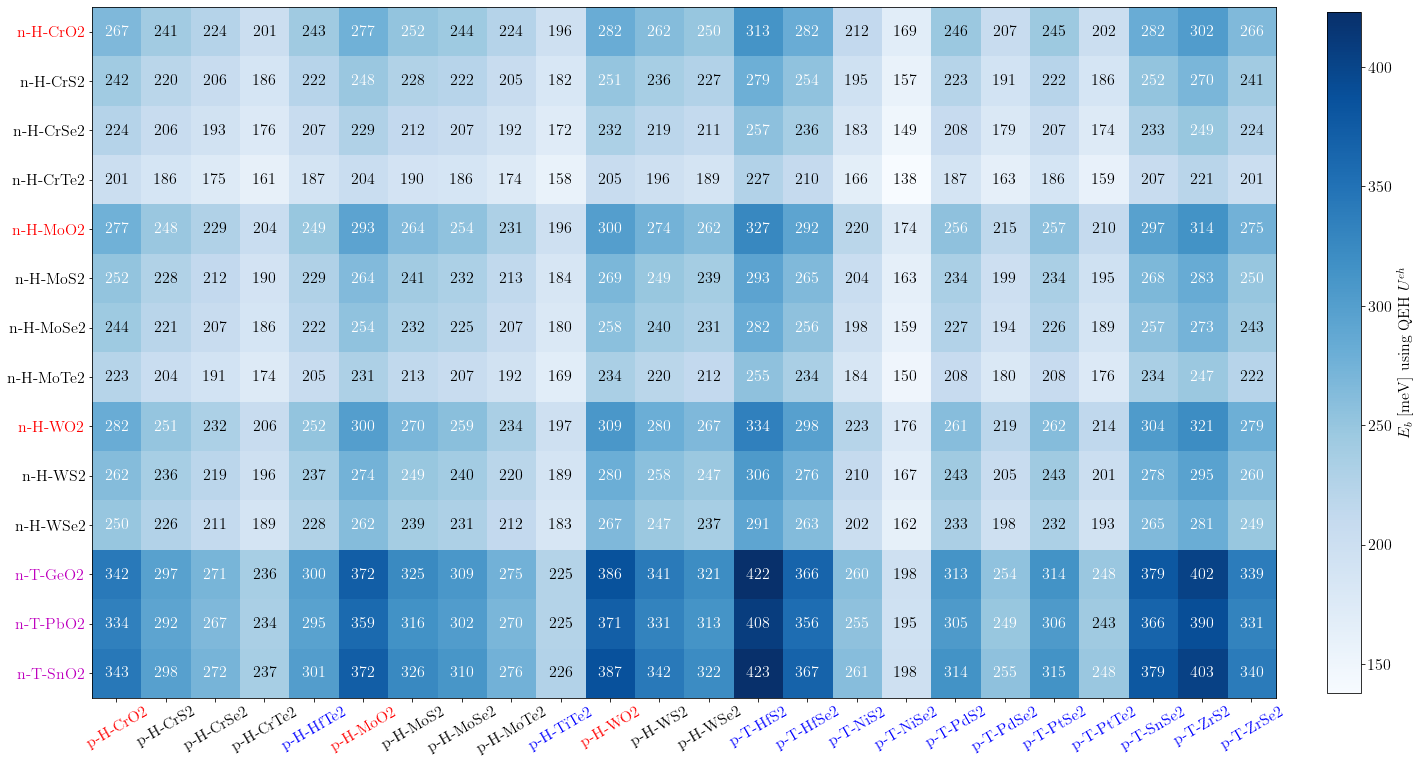

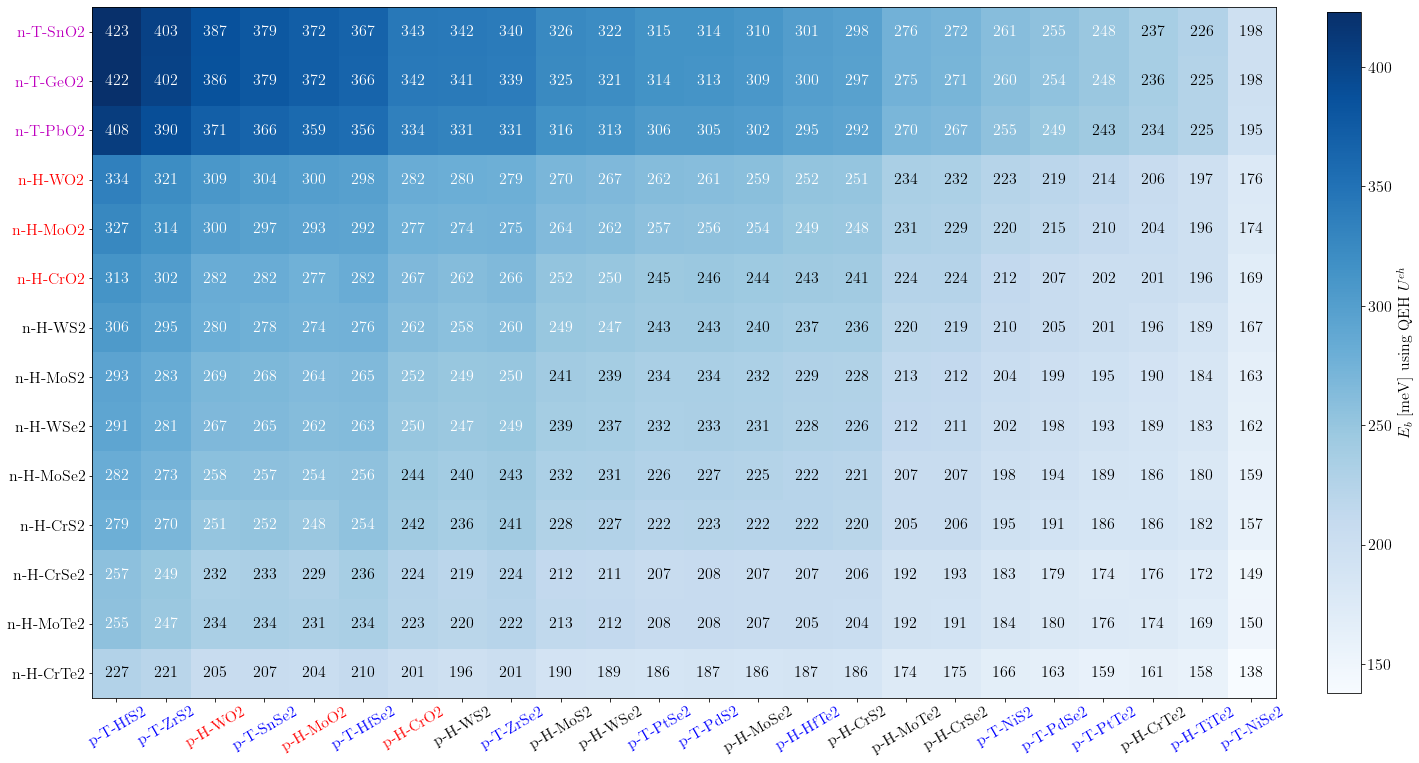

In [18]:
#load abinitio data again in case somebody excecuted the block below with the analytic data
vdWH_qeh = load_hs('wannier', nFilling, nPadding)
E_b_heat_mat = vdWH_qeh['E_b_heat_mat']
E_b_heat_mat = choose(E_b_heat_mat,xlabel_choose,ylabel_choose)
E_b_heat_matPlot = sort_matrix(E_b_heat_mat,RowOrder,ColumnOrder)
#plot
if np.shape(E_b_heat_mat)[0]>10:
    fig = plt.figure(1, figsize=(20,20))
else:
    fig = plt.figure(1, figsize=(6,6))
plt.xticks(rotation=30)

print('Exciton binding energies for different\n bilayer combinations with {} encapsulating and {} inner hBN layers\n using QEH masses and potentials'.format(nPadding, nFilling))
plot_E_B(E_b_heat_mat=E_b_heat_mat,E_b_heat_xlabels=E_b_heat_xlabels,E_b_heat_ylabels=E_b_heat_ylabels, cbarlabel=r'$E_b$ [meV] using QEH $U^{eh}$', file_ending='abinitio')
if np.shape(EbChoose)[0]>10:
    fig = plt.figure(1, figsize=(20,20))
else:
    fig = plt.figure(1, figsize=(6,6))
plt.xticks(rotation=30)
plot_E_B(E_b_heat_mat=E_b_heat_matPlot,E_b_heat_xlabels=xlabelsPlot,E_b_heat_ylabels=ylabelsPlot,cbarlabel=r'$E_b$ [meV] using QEH $U^{eh}$', file_ending='abinitio_sorted')
#plot_E_B(E_b_heat_mat=EbPlot,E_b_heat_xlabels=xlabelsPlot,E_b_heat_ylabels=ylabelsPlot, cbarlabel=r'$E_b$ [meV] using QEH $U^{eh}$', file_ending='abinitio_sorted')
#plot_E_B(E_b_heat_mat=EbChoose,E_b_heat_xlabels=xlabel_choose,E_b_heat_ylabels=ylabel_choose, cbarlabel=r'$E_b$ [meV] using QEH $U^{eh}$', file_ending='abinitio')

## Analytic Coulomb potential using QEH Masses

[[0.45675283 0.45669162 0.46002605 0.45549324 0.46140705 0.41374359
  0.4151131  0.42454374 0.42165901 0.4780237  0.40008326 0.42119426
  0.41948849 0.47307721 0.47057332 0.39647911 0.36155961 0.41350144
  0.38117398 0.40075968 0.36340866 0.42374462 0.46935987 0.46563027]
 [0.45669162 0.45663044 0.45996316 0.45543266 0.46134343 0.41370055
  0.41506958 0.42449674 0.4216131  0.47795061 0.40004477 0.42114853
  0.41944339 0.47300709 0.47050466 0.39644174 0.36153159 0.41345849
  0.38114102 0.40072098 0.36338021 0.42369792 0.4692919  0.46556438]
 [0.46002605 0.45996316 0.46339056 0.45873205 0.46481092 0.41603494
  0.41743045 0.42704844 0.42410482 0.48194397 0.40213071 0.42363071
  0.42189092 0.47683502 0.47425183 0.3984666  0.3630466  0.41578823
  0.38292521 0.40281858 0.3649189  0.42623286 0.47300063 0.46915771]
 [0.45549324 0.45543266 0.45873205 0.45424662 0.46009824 0.41285673
  0.41421631 0.42357548 0.4207132  0.47652127 0.39928973 0.42025201
  0.41855922 0.47163553 0.46916135 0.39570857

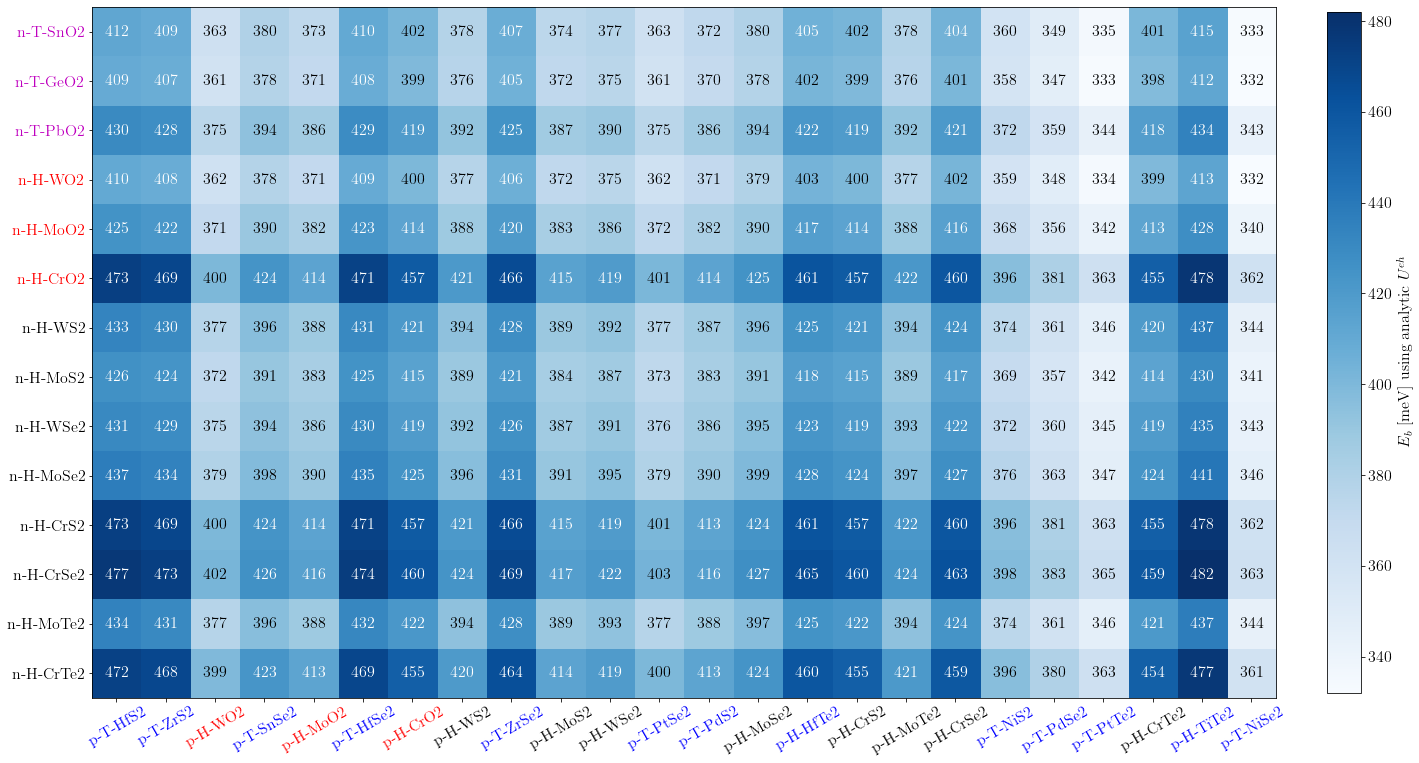

In [12]:
#load data for analytic interaction with fixed exciton thickness 1 nm
vdWH_analytic = load_hs('wannier_analytic', nFilling, nPadding)
E_b_heat_mat = vdWH_analytic['E_b_heat_mat']
E_b_heat_mat = choose(E_b_heat_mat,xlabel_choose,ylabel_choose)
E_b_heat_matPlot = sort_matrix(E_b_heat_mat,RowOrder,ColumnOrder)
#E_b_heat_xlabels = vdWH_analytic['E_b_heat_xlabels']
#E_b_heat_ylabels = vdWH_analytic['E_b_heat_ylabels']
print(E_b_heat_mat)
fig = plt.figure(1, figsize=(20,20))
plt.xticks(rotation=30)
print('Exciton binding energies for different\n bilayer combinations with {} encapsulating and {} inner hBN layers\n Analytic Coulomb Potential using QEH Masses'.format(nPadding, nFilling))
#plot_E_B(E_b_heat_mat,E_b_heat_xlabels=xlabel_choose,E_b_heat_ylabels=ylabel_choose, cbarlabel=r'$E_b$ [meV] using QEH $U^{eh}$', file_ending='analytic')
plot_E_B(E_b_heat_matPlot,xlabelsPlot,ylabelsPlot, cbarlabel=r'$E_b$ [meV] using analytic $U^{eh}$', file_ending='analytic')

[[0.54209898 0.51734529 0.5003678  0.48195033 0.49679403 0.48023672
  0.45800529 0.4620815  0.44967106 0.51862626 0.46244652 0.46358764
  0.45648892 0.53210041 0.52115744 0.46792562 0.40610212 0.48867739
  0.44316438 0.46540444 0.41454416 0.4676529  0.52842731 0.51604943]
 [0.51734529 0.4948803  0.47949466 0.46253037 0.47626414 0.45982418
  0.43957148 0.44355237 0.43210071 0.49663385 0.44319915 0.44484287
  0.43829837 0.50877398 0.49874292 0.4480769  0.39054826 0.46749253
  0.42503375 0.44591585 0.39833938 0.44863017 0.50532695 0.4939528 ]
 [0.5003678  0.47949466 0.46528513 0.44924951 0.46232104 0.4451883
  0.42637833 0.43041426 0.41961311 0.48204677 0.42923695 0.43150478
  0.42533636 0.49315331 0.48369066 0.43363743 0.37893886 0.45229847
  0.41168877 0.4317865  0.38626101 0.43512718 0.48977431 0.47901001]
 [0.48195033 0.46253037 0.44924951 0.43429209 0.4464693  0.43060576
  0.41298879 0.41677043 0.40663561 0.46469497 0.41564088 0.41779606
  0.4120109  0.47509557 0.46631569 0.41974762 

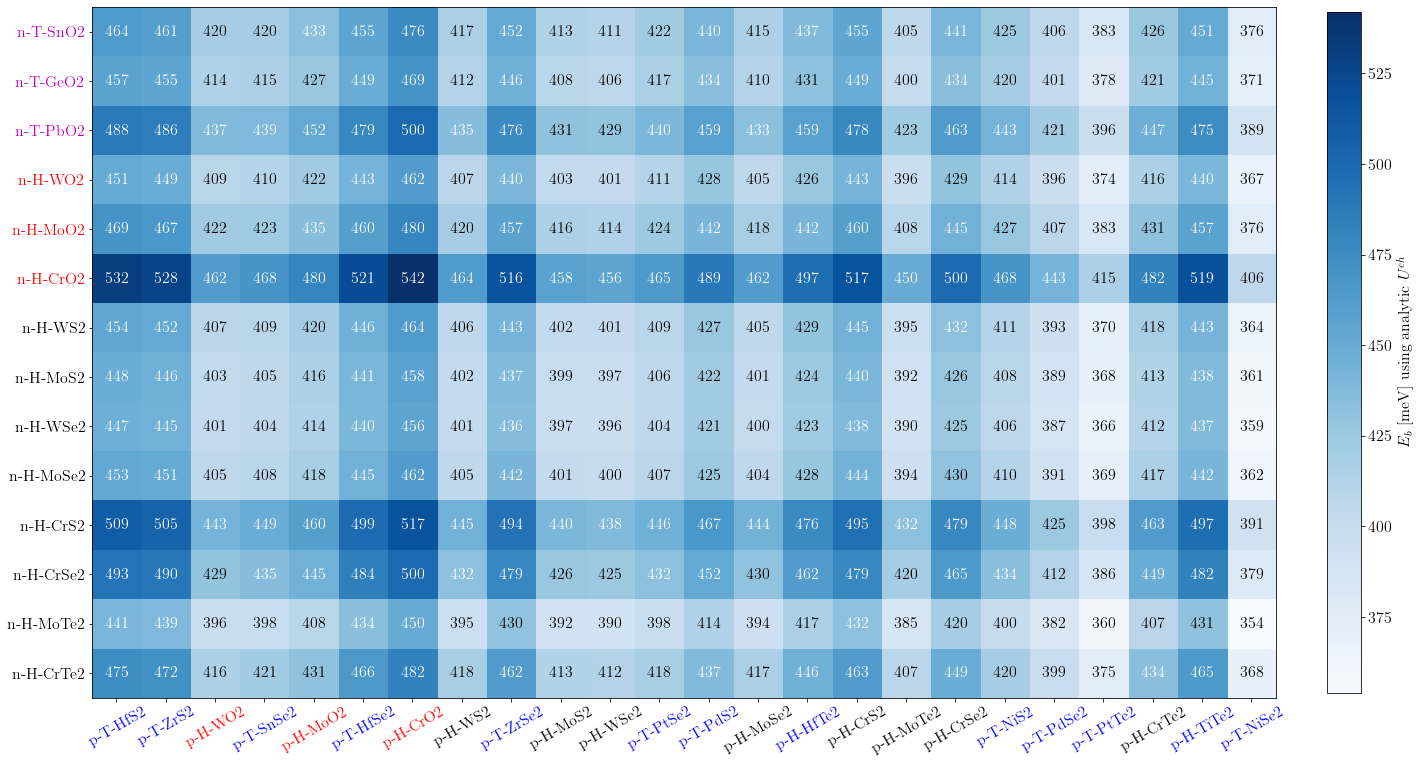

In [13]:
#load data for analytic interaction with varying thickness. Varying thickness
vdWH_analytic = load_hs('wannier_analytic_varying_thickness', nFilling, nPadding)
E_b_heat_mat = vdWH_analytic['E_b_heat_mat']
E_b_heat_mat = choose(E_b_heat_mat,xlabel_choose,ylabel_choose)
E_b_heat_matPlot = sort_matrix(E_b_heat_mat,RowOrder,ColumnOrder)
#E_b_heat_xlabels = vdWH_analytic['E_b_heat_xlabels']
#E_b_heat_ylabels = vdWH_analytic['E_b_heat_ylabels']
print(E_b_heat_mat)
fig = plt.figure(1, figsize=(20,20))
plt.xticks(rotation=30)
print('Exciton binding energies for different\n bilayer combinations with {} encapsulating and {} inner hBN layers\n Analytic Coulomb Potential using QEH Masses'.format(nPadding, nFilling))
#plot_E_B(E_b_heat_mat,E_b_heat_xlabels=xlabel_choose,E_b_heat_ylabels=ylabel_choose, cbarlabel=r'$E_b$ [meV] using QEH $U^{eh}$', file_ending='analytic')
plot_E_B(E_b_heat_matPlot,xlabelsPlot,ylabelsPlot, cbarlabel=r'$E_b$ [meV] using analytic $U^{eh}$', file_ending='analytic_varThick')

Exciton mass
[[0.43660097 0.4363201  0.4519449  0.43086534 0.45861503 0.28308161
  0.28687011 0.31462135 0.30581254 0.54916385 0.24828785 0.30442053
  0.29937443 0.52007414 0.5060745  0.23994211 0.17351133 0.28241781
  0.20786135 0.24989075 0.1764676  0.31215174 0.49945688 0.47977179]
 [0.4363201  0.43603959 0.45164395 0.4305918  0.45830514 0.28296351
  0.28674882 0.31447547 0.30567472 0.54871956 0.248197   0.30428395
  0.29924234 0.51967566 0.50569718 0.23985726 0.17346695 0.28230026
  0.20779766 0.24979871 0.1764217  0.31200814 0.49908936 0.47943266]
 [0.4519449  0.45164395 0.46840661 0.44580188 0.47557536 0.28945333
  0.29341549 0.32251177 0.31326209 0.57366148 0.253176   0.31180159
  0.30650995 0.5419934  0.52680605 0.24450415 0.17588446 0.28875935
  0.21127635 0.25484285 0.17892286 0.31991725 0.51963898 0.49836475]
 [0.43086534 0.4305918  0.44580188 0.42527846 0.45229062 0.28065922
  0.28438272 0.31163195 0.30298744 0.54012014 0.24642238 0.30162097
  0.2966665  0.51195608 0.498384

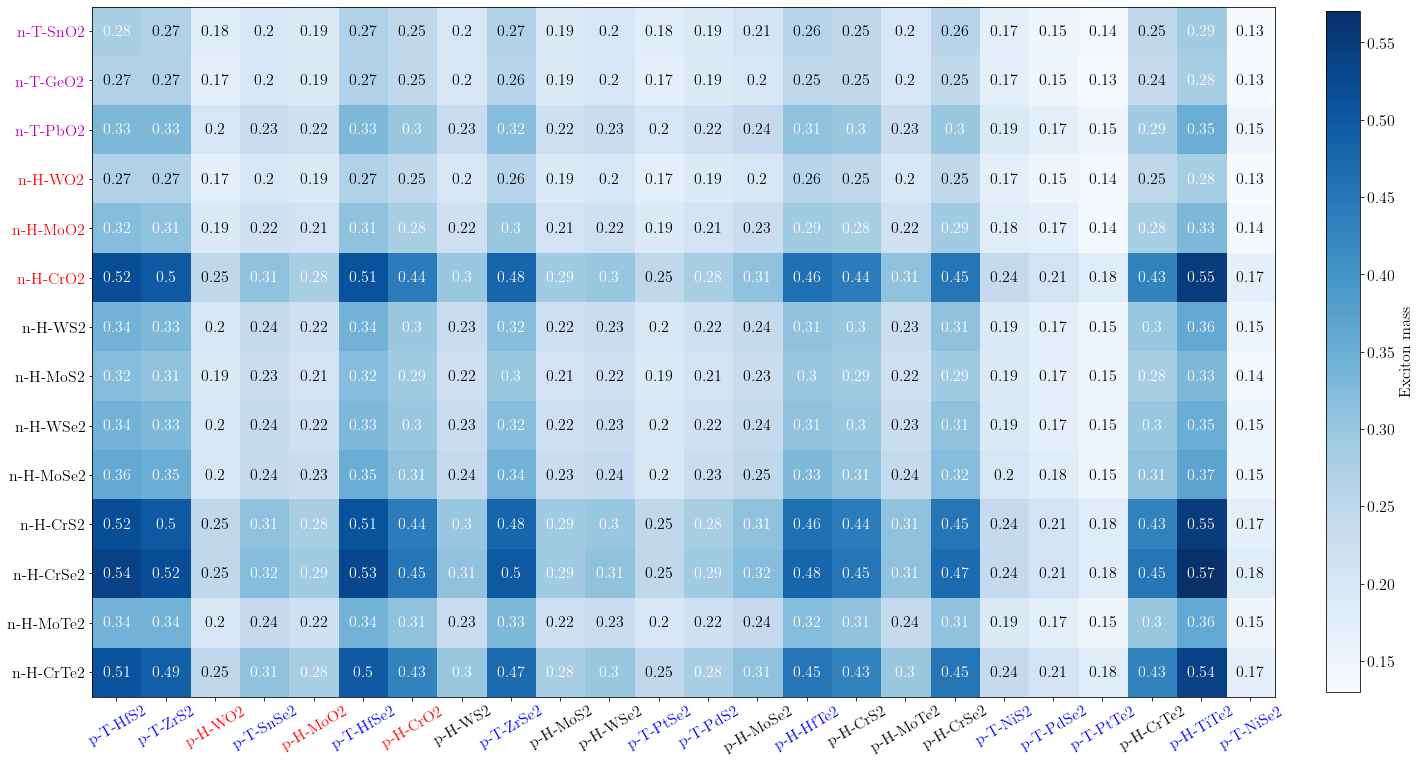

In [14]:
#effective masses that we use
mu_matrix = vdWH_analytic['effmass_Matrix']
mu_matrixPlot = sort_matrix(mu_matrix,RowOrder,ColumnOrder)
description = 'Exciton mass'
print(description)
print(mu_matrix)
fig = plt.figure(1, figsize=(20,20))
heatmap(np.round(mu_matrixPlot,2),xlabelsPlot,ylabelsPlot, cbarlabel=r'Exciton mass',
    cmap='Blues')
plt.xticks(rotation=30)
plt.tight_layout()
plt.savefig('./plots/vdWH_excMass.pdf')
plt.savefig('./plots/vdWH_excMass.png')
plt.show()

Total distance
[[0.43660097 0.4363201  0.4519449  0.43086534 0.45861503 0.28308161
  0.28687011 0.31462135 0.30581254 0.54916385 0.24828785 0.30442053
  0.29937443 0.52007414 0.5060745  0.23994211 0.17351133 0.28241781
  0.20786135 0.24989075 0.1764676  0.31215174 0.49945688 0.47977179]
 [0.4363201  0.43603959 0.45164395 0.4305918  0.45830514 0.28296351
  0.28674882 0.31447547 0.30567472 0.54871956 0.248197   0.30428395
  0.29924234 0.51967566 0.50569718 0.23985726 0.17346695 0.28230026
  0.20779766 0.24979871 0.1764217  0.31200814 0.49908936 0.47943266]
 [0.4519449  0.45164395 0.46840661 0.44580188 0.47557536 0.28945333
  0.29341549 0.32251177 0.31326209 0.57366148 0.253176   0.31180159
  0.30650995 0.5419934  0.52680605 0.24450415 0.17588446 0.28875935
  0.21127635 0.25484285 0.17892286 0.31991725 0.51963898 0.49836475]
 [0.43086534 0.4305918  0.44580188 0.42527846 0.45229062 0.28065922
  0.28438272 0.31163195 0.30298744 0.54012014 0.24642238 0.30162097
  0.2966665  0.51195608 0.4983

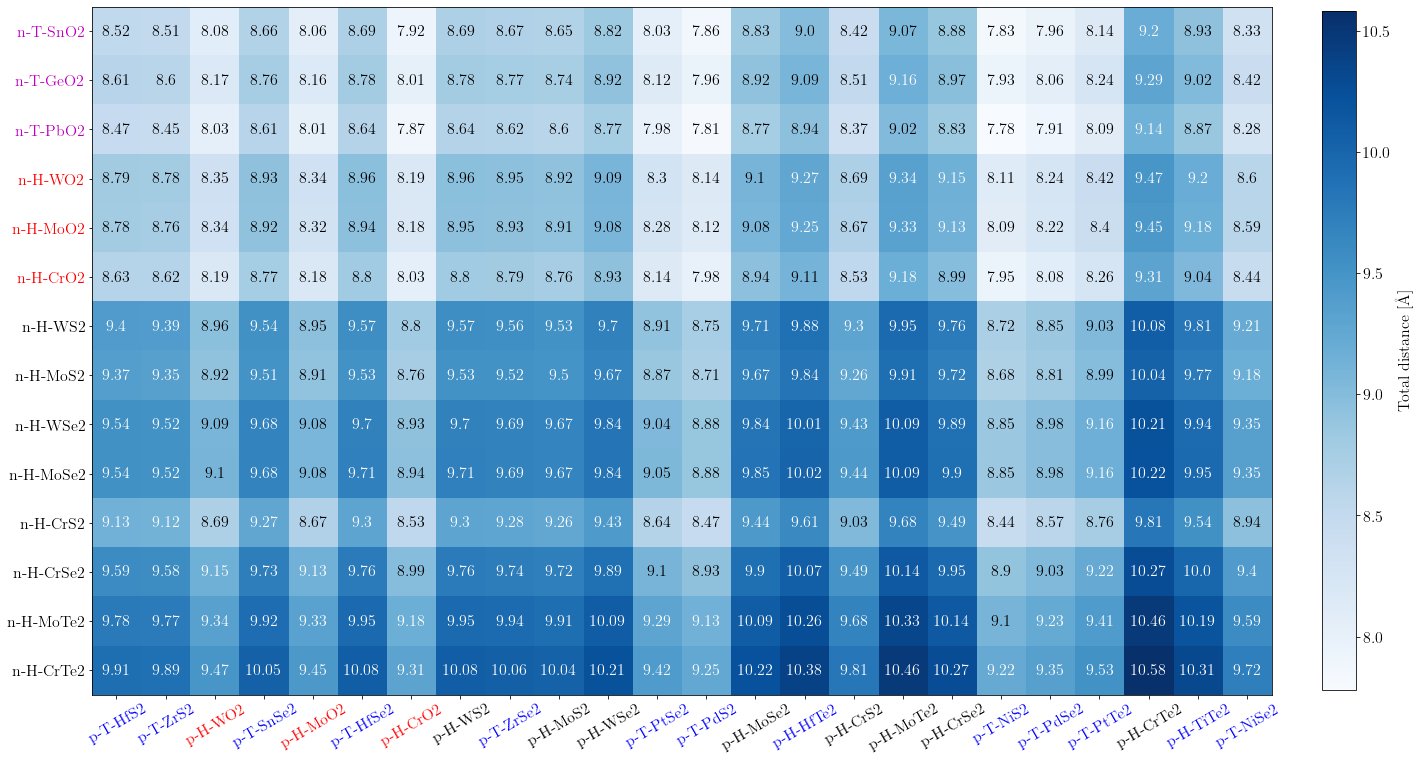

In [15]:
#total interlayer distances that we use
d0_Matrix = vdWH_analytic['d0_Matrix']
d0_MatrixPlot = sort_matrix(d0_Matrix,RowOrder,ColumnOrder)
description = 'Total distance'
print(description)
print(mu_matrix)
fig = plt.figure(1, figsize=(20,20))
heatmap(np.round(d0_MatrixPlot,2),xlabelsPlot,ylabelsPlot, cbarlabel=r'Total distance [Å]',
    cmap='Blues')
plt.xticks(rotation=30)
plt.tight_layout()
plt.savefig('./plots/vdWH_distance.pdf')
plt.savefig('./plots/vdWH_distance.png')
plt.show()

Total distance
[[0.43660097 0.4363201  0.4519449  0.43086534 0.45861503 0.28308161
  0.28687011 0.31462135 0.30581254 0.54916385 0.24828785 0.30442053
  0.29937443 0.52007414 0.5060745  0.23994211 0.17351133 0.28241781
  0.20786135 0.24989075 0.1764676  0.31215174 0.49945688 0.47977179]
 [0.4363201  0.43603959 0.45164395 0.4305918  0.45830514 0.28296351
  0.28674882 0.31447547 0.30567472 0.54871956 0.248197   0.30428395
  0.29924234 0.51967566 0.50569718 0.23985726 0.17346695 0.28230026
  0.20779766 0.24979871 0.1764217  0.31200814 0.49908936 0.47943266]
 [0.4519449  0.45164395 0.46840661 0.44580188 0.47557536 0.28945333
  0.29341549 0.32251177 0.31326209 0.57366148 0.253176   0.31180159
  0.30650995 0.5419934  0.52680605 0.24450415 0.17588446 0.28875935
  0.21127635 0.25484285 0.17892286 0.31991725 0.51963898 0.49836475]
 [0.43086534 0.4305918  0.44580188 0.42527846 0.45229062 0.28065922
  0.28438272 0.31163195 0.30298744 0.54012014 0.24642238 0.30162097
  0.2966665  0.51195608 0.4983

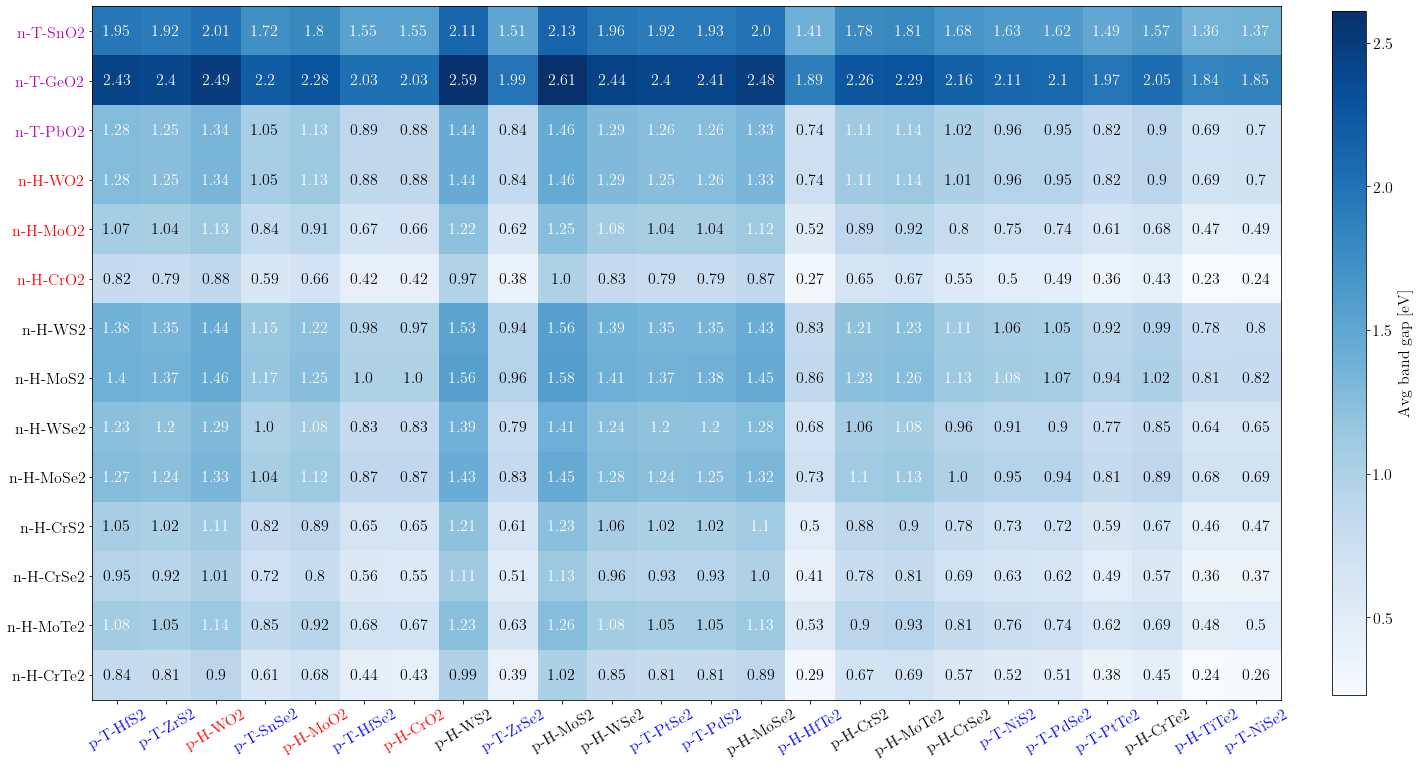

In [16]:
#Average bandgap of materials
avgBandgap_Matrix = vdWH_analytic['avgBandgap_Matrix']
avgBandgap_MatrixPlot = sort_matrix(avgBandgap_Matrix,RowOrder,ColumnOrder)
description = 'Total distance'
print(description)
print(mu_matrix)
fig = plt.figure(1, figsize=(20,20))
heatmap(np.round(avgBandgap_MatrixPlot,2),xlabelsPlot,ylabelsPlot, cbarlabel=r'Avg band gap [eV]',
    cmap='Blues')
plt.xticks(rotation=30)
plt.tight_layout()
plt.savefig('./plots/vdWH_avgBandgap.pdf')
plt.savefig('./plots/vdWH_avgBandgap.png')
plt.show()

Well depth
[[0.43660097 0.4363201  0.4519449  0.43086534 0.45861503 0.28308161
  0.28687011 0.31462135 0.30581254 0.54916385 0.24828785 0.30442053
  0.29937443 0.52007414 0.5060745  0.23994211 0.17351133 0.28241781
  0.20786135 0.24989075 0.1764676  0.31215174 0.49945688 0.47977179]
 [0.4363201  0.43603959 0.45164395 0.4305918  0.45830514 0.28296351
  0.28674882 0.31447547 0.30567472 0.54871956 0.248197   0.30428395
  0.29924234 0.51967566 0.50569718 0.23985726 0.17346695 0.28230026
  0.20779766 0.24979871 0.1764217  0.31200814 0.49908936 0.47943266]
 [0.4519449  0.45164395 0.46840661 0.44580188 0.47557536 0.28945333
  0.29341549 0.32251177 0.31326209 0.57366148 0.253176   0.31180159
  0.30650995 0.5419934  0.52680605 0.24450415 0.17588446 0.28875935
  0.21127635 0.25484285 0.17892286 0.31991725 0.51963898 0.49836475]
 [0.43086534 0.4305918  0.44580188 0.42527846 0.45229062 0.28065922
  0.28438272 0.31163195 0.30298744 0.54012014 0.24642238 0.30162097
  0.2966665  0.51195608 0.49838438

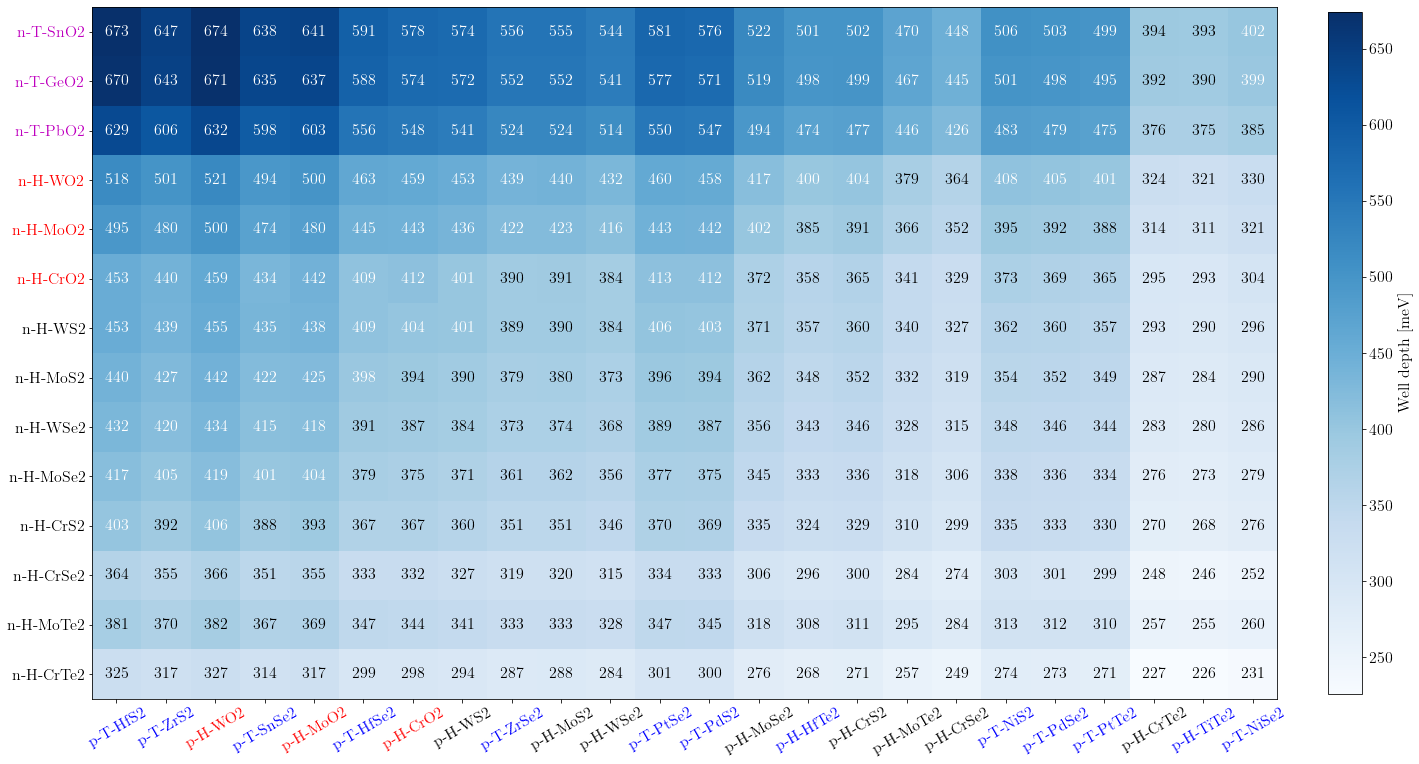

In [24]:
#Well depth of interaction in real space between materials
welldepth_Matrix = -vdWH_qeh['weel_depth']
welldepth_MatrixPlot = sort_matrix(welldepth_Matrix,RowOrder,ColumnOrder)
description = 'Well depth'
print(description)
print(mu_matrix)
fig = plt.figure(1, figsize=(20,20))
heatmap(np.round(10**3*welldepth_MatrixPlot,0).astype(int),xlabelsPlot,ylabelsPlot, cbarlabel=r'Well depth [meV]',
    cmap='Blues')
plt.xticks(rotation=30)
plt.tight_layout()
plt.savefig('./plots/vdWH_wellDepth.pdf')
plt.savefig('./plots/vdWH_wellDepth.png')
plt.show()

int_strength_q
[[0.43660097 0.4363201  0.4519449  0.43086534 0.45861503 0.28308161
  0.28687011 0.31462135 0.30581254 0.54916385 0.24828785 0.30442053
  0.29937443 0.52007414 0.5060745  0.23994211 0.17351133 0.28241781
  0.20786135 0.24989075 0.1764676  0.31215174 0.49945688 0.47977179]
 [0.4363201  0.43603959 0.45164395 0.4305918  0.45830514 0.28296351
  0.28674882 0.31447547 0.30567472 0.54871956 0.248197   0.30428395
  0.29924234 0.51967566 0.50569718 0.23985726 0.17346695 0.28230026
  0.20779766 0.24979871 0.1764217  0.31200814 0.49908936 0.47943266]
 [0.4519449  0.45164395 0.46840661 0.44580188 0.47557536 0.28945333
  0.29341549 0.32251177 0.31326209 0.57366148 0.253176   0.31180159
  0.30650995 0.5419934  0.52680605 0.24450415 0.17588446 0.28875935
  0.21127635 0.25484285 0.17892286 0.31991725 0.51963898 0.49836475]
 [0.43086534 0.4305918  0.44580188 0.42527846 0.45229062 0.28065922
  0.28438272 0.31163195 0.30298744 0.54012014 0.24642238 0.30162097
  0.2966665  0.51195608 0.4983

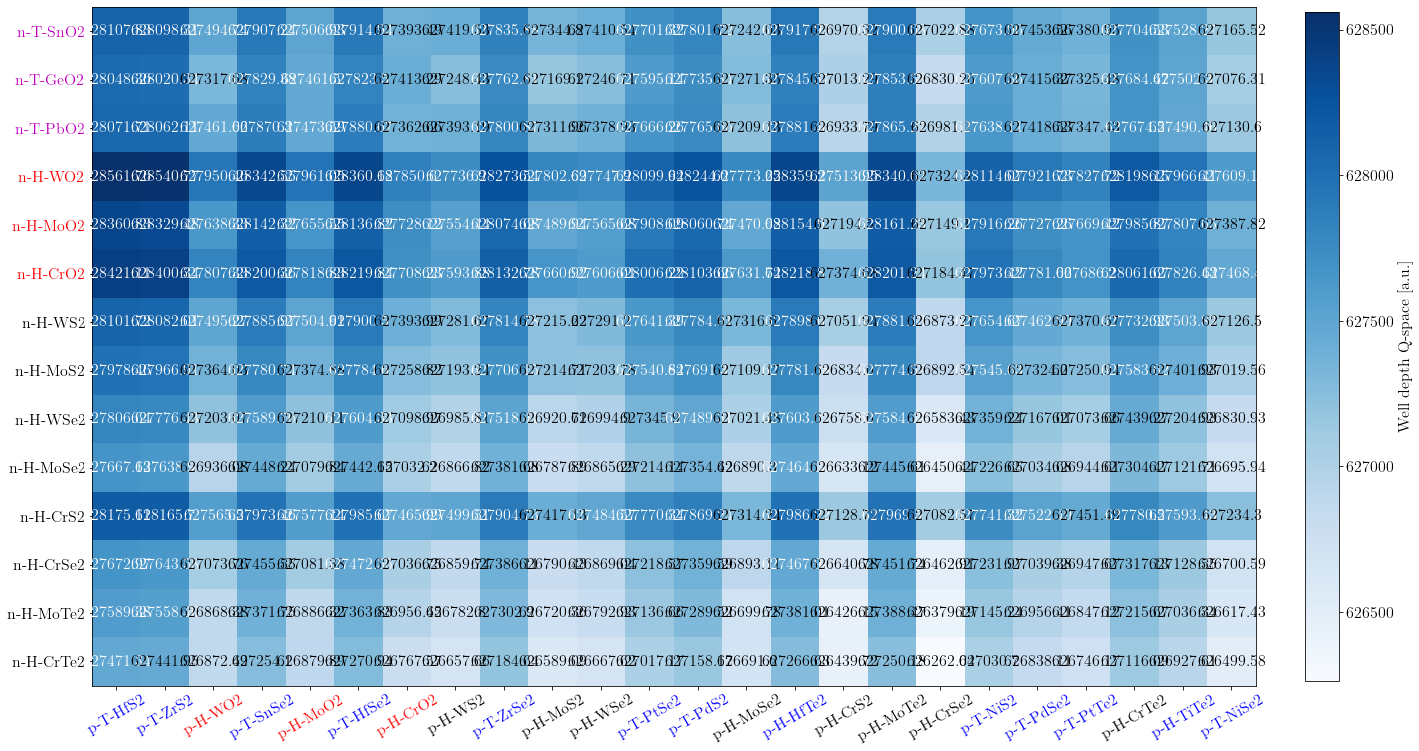

In [22]:
#Well depth of interaction in q-space between materials
welldepthQ_Matrix = -vdWH_qeh['int_strength_q']
welldepthQ_MatrixPlot = sort_matrix(welldepthQ_Matrix,RowOrder,ColumnOrder)
description = 'int_strength_q'
print(description)
print(mu_matrix)
fig = plt.figure(1, figsize=(20,20))
heatmap(np.round(welldepthQ_MatrixPlot,2),xlabelsPlot,ylabelsPlot, cbarlabel=r'Well depth Q-space [a.u.]',
    cmap='Blues')
plt.xticks(rotation=30)
plt.tight_layout()
plt.savefig('./plots/vdWH_wellDepthQ.pdf')
plt.savefig('./plots/vdWH_wellDepthQ.png')
plt.show()